In [3]:
from sklearn import svm
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np


def plot_hyperplane(clf, X, y, h=0.02, draw_sv=True, title='hyperplan'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='hot', alpha=0.5)
    
    markers = ['o', 's', '^']
    colors = ['b', 'r', 'c']
    labels = np.unique(y)
    for label in labels:
        plt.scatter(X[y==label][:, 0], 
                    X[y==label][:, 1], 
                    c=colors[label], 
                    marker=markers[label], s=20)
    if draw_sv:
        sv = clf.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], c='black', marker='x', s=15)




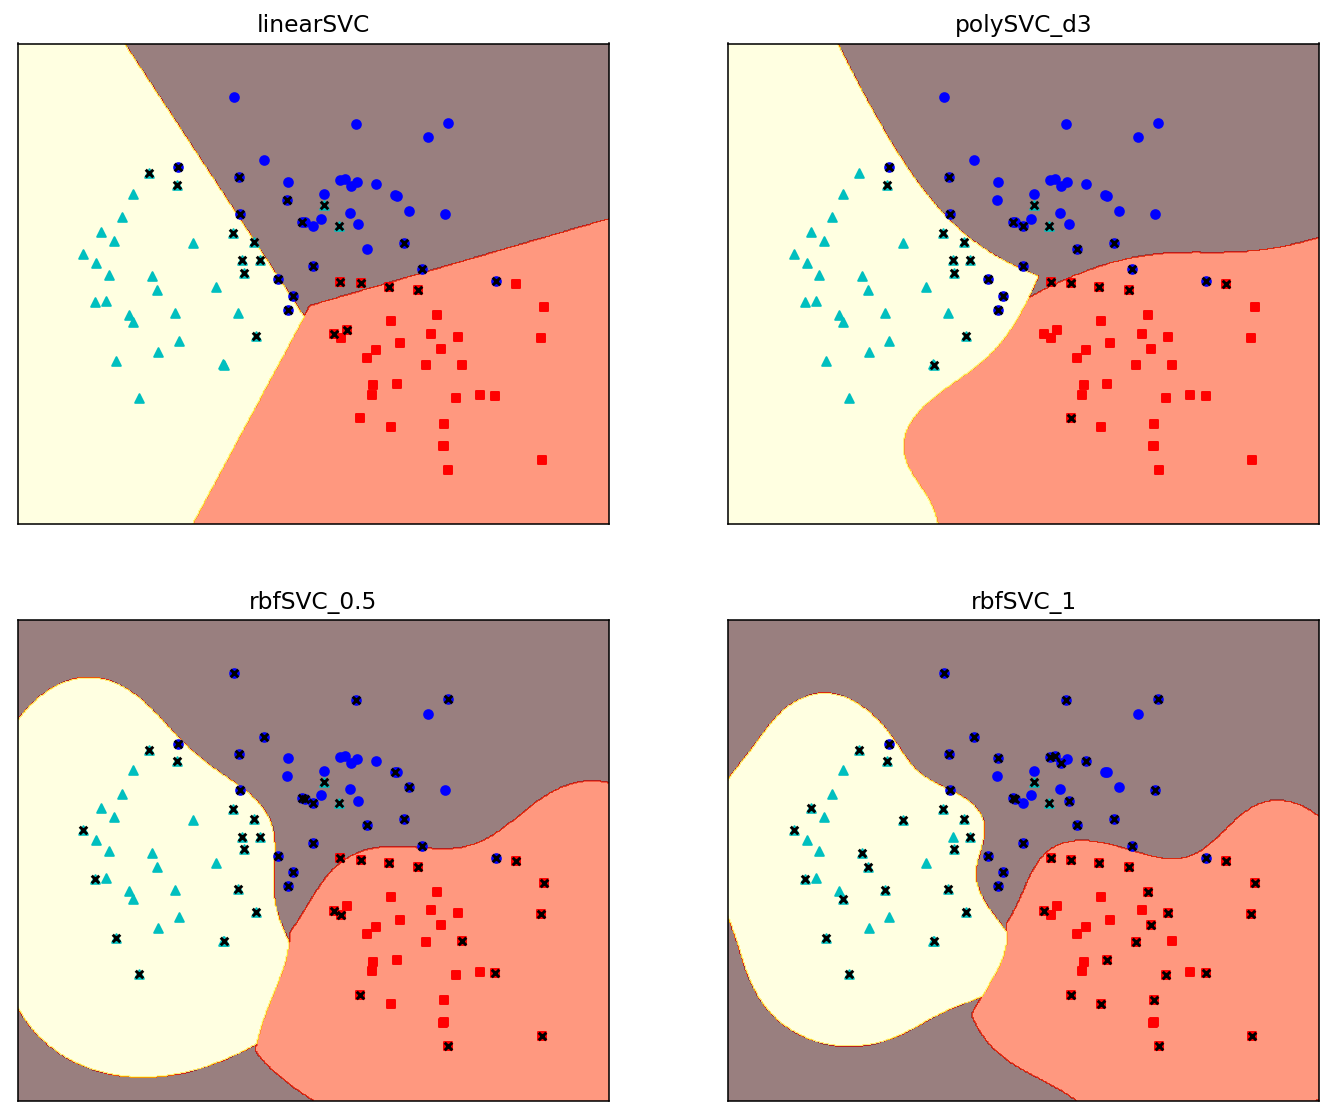

In [8]:
##########生成一个有两个特征、三纵类别的数据集，然后分别构造4个SVM算法来拟合数据集

X, y = make_blobs(n_samples=100, centers=3, random_state=0, cluster_std=1) #一般用大写X，表示含多个特征

clf_linear = svm.SVC(C=1.0, kernel='linear')       #线性核
clf_poly = svm.SVC(C=1.0, kernel='poly', degree=3,gamma='auto') #三阶多项式核函数
clf_rbf = svm.SVC(C=1.0, kernel='rbf', gamma=0.5)  #gamma=0.5的高斯核RBF核函数，gamma越大，越易欠拟合，与C的作用相反
clf_rbf1 = svm.SVC(C=1.0, kernel='rbf', gamma=1)   #

plt.figure(figsize=(12,10),dpi=140)

clfs = [clf_linear, clf_poly, clf_rbf, clf_rbf1]
titles = ['linearSVC','polySVC_d3','rbfSVC_0.5','rbfSVC_1']

for clf, i in zip(clfs, range(len(clfs))):  #并行迭代，分别绘出不同分类结果图
    clf.fit(X, y)
    plt.subplot(2, 2, i+1)
    plot_hyperplane(clf, X, y, title=titles[i])